Integrantes: Jaime Vergara, Robin Restrepo y Jorge Bolívar

# Problema:
Una compañía fabrica dos tipos de productos, A y B. Cada producto A genera una ganancia de 20 unidades monetarias, mientras que cada producto B genera una ganancia de 30 unidades monetarias. Para fabricar un producto A se requieren 2 horas de trabajo y 3 unidades de materia prima. Para fabricar un producto B se necesitan 4 horas de trabajo y 2 unidades de materia prima.
La compañía dispone de un total de 100 horas de trabajo y 80 unidades de materia prima. ¿Cuántas unidades de cada producto debe fabricar la compañía para maximizar su ganancia?
Formulación del problema:
Definamos las variables:
	x: número de productos A que se deben fabricar.
	y: número de productos B que se deben fabricar.
Función objetivo (maximizar):
z=20x+30y
donde z es la ganancia total.

Restricciones:
	2x+4y≤100  (limitación por horas de trabajo).
	3x+2y≤80 (limitación por unidades de materia prima).
	x≥0,  y≥0  (no puede haber productos negativos).
Tu objetivo es maximizar z sujeto a estas restricciones.


#Region Factible:

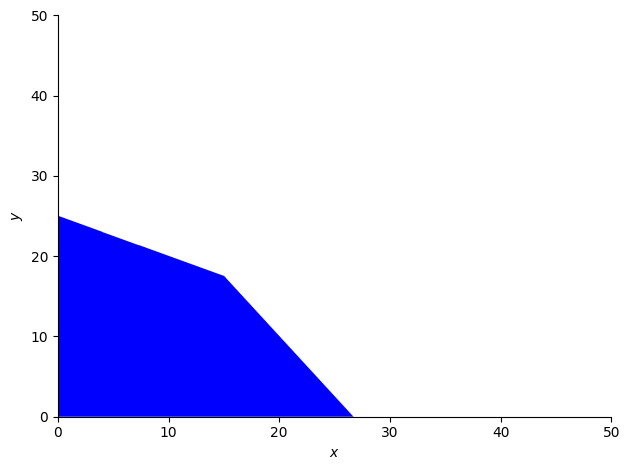

Puntos de intersección:
{x: 15, y: 35/2} {x: 50, y: 0} {x: 80/3, y: 0}
Ganancia en el punto {x: 15, y: 35/2}: 825
Ganancia en el punto {x: 50, y: 0}: 1000
Ganancia en el punto {x: 80/3, y: 0}: 1600/3


In [29]:
import sympy as sp
from sympy.plotting import plot_implicit  # Importa plot_implicit

# Se Definen las variables
x, y = sp.symbols('x y')

# Se ponen las restricciones
constraint_1 = 2*x + 4*y <= 100
constraint_2 = 3*x + 2*y <= 80

# Se grafica la región factible
plot_implicit(sp.And(constraint_1, constraint_2, x >= 0, y >= 0), (x, 0, 50), (y, 0, 50))

# Se resuelve el sistema de ecuaciones para encontrar puntos de intersección
eq1 = sp.Eq(2*x + 4*y, 100)
eq2 = sp.Eq(3*x + 2*y, 80)

# Las soluciones
solution_1 = sp.solve([eq1, eq2], (x, y))  # Punto de intersección de las dos restricciones
solution_2 = sp.solve([eq1, y], (x, y))    # Intersección de eq1 con el eje x o y
solution_3 = sp.solve([eq2, y], (x, y))    # Intersección de eq2 con el eje x o y

print("Puntos de intersección:")
print(solution_1, solution_2, solution_3)

# Se evalua la funcion objetico en estos puntos para encontrar el valor máximo.
z = 20*x + 30*y

# Se evalua z en cada punto de intersección
points = [solution_1, solution_2, solution_3]
for point in points:
    z_val = z.subs(point)
    print(f"Ganancia en el punto {point}: {z_val}")


2.	Selecciona un método de representación de matrices sparse e impleméntalo en Python desde cero. Compara tus resultados con la función de las librerías de Python.

In [28]:
import numpy as np
from scipy.sparse import csr_matrix

class SparseMatrix:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.data = []
        self.indices = []
        self.indptr = [0]

    def add_element(self, row, col, value):
        # Se añade el valor y columna correspondiente
        self.data.append(value)
        self.indices.append(col)

        # Se verifica si se esta añadiendo un elemento en una nueva fila
        if row >= len(self.indptr) - 1:
            # Si es una nueva fila, extiende indptr hasta esa fila
            self.indptr.extend([len(self.data)] * (row - len(self.indptr) + 2))
        else:
            # Si la fila ya existe, actualiza los punteros de las filas posteriores
            for i in range(row + 1, len(self.indptr)):
                self.indptr[i] += 1


    def to_csr_matrix(self):
        return self.data, self.indices, self.indptr

# Ejemplos de uso
matrix = SparseMatrix(3, 3)
matrix.add_element(0, 0, 1)
matrix.add_element(0, 2, 2)
matrix.add_element(1, 1, 3)
matrix.add_element(2, 0, 4)
matrix.add_element(2, 2, 5)

data, indices, indptr = matrix.to_csr_matrix()
print("-------------------")
print("Data:", data)
print("Indices:", indices)
print("Indptr:", indptr)
print("-------------------")

# Se crea la matriz densa
dense_matrix = np.array([
    [1, 0, 2],
    [0, 3, 0],
    [4, 0, 5]
])

# Se convierte la matriz densa a una matriz CSR
sparse_matrix = csr_matrix(dense_matrix)

# Se extraen los arreglos de datos, índices e indptr
data = sparse_matrix.data
indices = sparse_matrix.indices
indptr = sparse_matrix.indptr

print("Data:", data)
print("Indices:", indices)
print("Indptr:", indptr)

-------------------
Data: [1, 2, 3, 4, 5]
Indices: [0, 2, 1, 0, 2]
Indptr: [0, 2, 3, 5]
-------------------
Data: [1 2 3 4 5]
Indices: [0 2 1 0 2]
Indptr: [0 2 3 5]


3.	Crea un programa para implementar la expansión en series de Taylor. El usuario debe ingresar la cantidad de términos de la expansión, el punto de expansión y la función a representar (debe tener al menos 5 funciones diferentes para escoger). Se debe mostrar en una gráfica la función original y la aproximación.

Elige una función para aproximar:
1: sin(x)
2: cos(x)
3: exp(x)
4: log(1+x)
5: tan(x)
Introduce el número de tu elección: 1
Introduce el número de términos en la expansión de Taylor: 5
Introduce el punto de expansión: 0


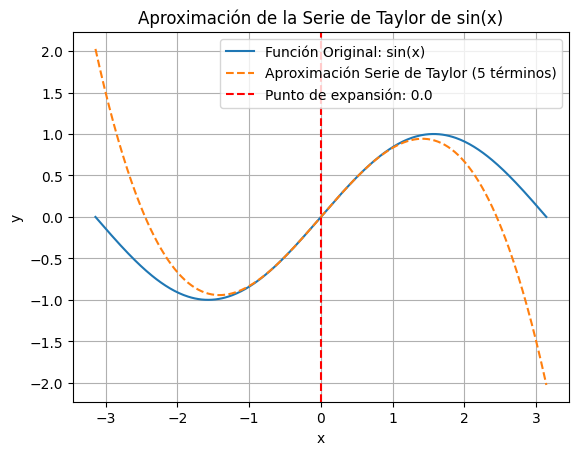

In [27]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Se Definen las funciones disponibles para la expansión de Taylor
def func_choice(choice):
    if choice == 1:
        return sp.sin(x), "sin(x)"
    elif choice == 2:
        return sp.cos(x), "cos(x)"
    elif choice == 3:
        return sp.exp(x), "exp(x)"
    elif choice == 4:
        return sp.log(1 + x), "log(1+x)"  # Logaritmo natural (válido para x > -1)
    elif choice == 5:
        return sp.tan(x), "tan(x)"
    else:
        raise ValueError("Elección de función inválida")

# Se Obtiene la elección del usuario
print("Elige una función para aproximar:")
print("1: sin(x)")
print("2: cos(x)")
print("3: exp(x)")
print("4: log(1+x)")
print("5: tan(x)")
choice = int(input("Introduce el número de tu elección: "))

num_terms = int(input("Introduce el número de términos en la expansión de Taylor: "))
expansion_point = float(input("Introduce el punto de expansión: "))

# Se define la variable y el símbolo de la función
x = sp.Symbol('x')
f, f_str = func_choice(choice)

# Se calcula la aproximación de la serie de Taylor
taylor_series = sp.series(f, x, expansion_point, num_terms).removeO()

# Se convierte la expresión de sympy a una función de numpy
taylor_func = sp.lambdify(x, taylor_series, modules=['numpy'])

# Se generan valores de x para la gráfica
if choice == 4:
    # Se limita el dominio de log(1 + x) para evitar valores menores que -1
    x_vals = np.linspace(max(-0.99, expansion_point - np.pi), expansion_point + np.pi, 400)
else:
    x_vals = np.linspace(expansion_point - np.pi, expansion_point + np.pi, 400)

# Se evalua la función original y la aproximación de la serie de Taylor
if choice == 1:
    y_vals_func = np.sin(x_vals)
elif choice == 2:
    y_vals_func = np.cos(x_vals)
elif choice == 3:
    y_vals_func = np.exp(x_vals)
elif choice == 4:
    y_vals_func = np.log(1 + x_vals)
elif choice == 5:
    y_vals_func = np.tan(x_vals)

y_vals_taylor = taylor_func(x_vals)

# Se grafica la función original y la aproximación de la serie de Taylor
plt.plot(x_vals, y_vals_func, label=f'Función Original: {f_str}')
plt.plot(x_vals, y_vals_taylor, label=f'Aproximación Serie de Taylor ({num_terms} términos)', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(expansion_point, color='r', linestyle='--', label=f'Punto de expansión: {expansion_point}')
plt.legend()
plt.title(f'Aproximación de la Serie de Taylor de {f_str}')
plt.grid(True)
plt.show()


4.	Escoge 3 algoritmos de optimización sin restricciones. Realiza cambios sobre sus parámetros y sobre el punto inicial. ¿Cómo afectan estos cambios los resultados? ¿Cómo afecta el tiempo de convergencia o cantidad de iteraciones? Nota: Puedes utilizar las librerías de Python y alguna ayuda gráfica o tabulaciones si lo necesitan para soportar sus conclusiones.

# Comparación de Algoritmos de Optimización sin Restricciones

## Introducción

En este trabajo, comparamos tres algoritmos de optimización sin restricciones utilizando una función cuadrática como ejemplo. Los algoritmos seleccionados son:

- **Gradiente Descendente** (Gradient Descent)
- **BFGS** (Broyden-Fletcher-Goldfarb-Shanno)
- **Nelder-Mead**

Usamos la siguiente función cuadrática como nuestro objetivo de minimización:

$$f(x) = x_1^2 + x_2^2$$

El mínimo global de esta función es en el punto $(0, 0)$.


## Descripción de los Algoritmos

### Gradiente Descendente
Este algoritmo sigue la dirección del gradiente de la función, actualizando los parámetros hasta que el valor del gradiente sea lo suficientemente pequeño o una condición de convergencia se cumpla. Se considera altamente sensible al punto inicial y al valor de la tasa de aprendizaje.

### BFGS
El algoritmo BFGS es un método de cuasi-Newton que no requiere el cálculo explícito de la matriz Hessiana (segunda derivada), sino que la aproxima iterativamente. Esto lo hace eficiente en términos de convergencia, especialmente en comparación con el gradiente descendente.

### Nelder-Mead
Nelder-Mead es un algoritmo basado en la simplicidad que busca el mínimo evaluando la función objetivo en varios puntos cercanos y ajustando su forma. Es particularmente útil para funciones no diferenciables o ruidosas.


## Experimentos y Comparación

Para realizar la comparación, se probaron tres puntos iniciales diferentes para cada algoritmo:

$$x_0 = \{[10, 10], [5, 5], [1, 1]\}$$

Se evaluaron las siguientes métricas:

- **Número de iteraciones**: Cantidad de pasos necesarios para que el algoritmo alcance el mínimo.
- **Tiempo de convergencia**: Tiempo total requerido por el algoritmo para converger al mínimo.
- **Precisión**: Qué tan cerca del mínimo global $(0, 0)$ llega el algoritmo.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definimos la función a minimizar
def func(x):
    return x[0]**2 + x[1]**2

# Parámetros iniciales
x0_list = [np.array([10, 10]), np.array([5, 5]), np.array([1, 1])]  # Tres puntos iniciales

# Diccionario para almacenar los resultados
results = {}

# Algoritmos
algorithms = ['CG', 'BFGS', 'Nelder-Mead']

for algo in algorithms:
    results[algo] = []
    for x0 in x0_list:
        res = minimize(func, x0, method=algo, options={'disp': True})
        results[algo].append(res)


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 12
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 12
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 12
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 12
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 9
         Gradi

## Resultados

### Gradiente Descendente

**Efectos de los cambios**:
- El tiempo de convergencia depende del punto inicial. Cuanto más lejos esté el punto inicial del mínimo, más iteraciones y tiempo requiere para converger.
- Ajustar la tasa de aprendizaje impacta la velocidad de convergencia. Si la tasa es muy grande, el algoritmo puede oscilar alrededor del mínimo sin llegar a converger.

### BFGS

**Efectos de los cambios**:
- Este método es más eficiente en términos de convergencia. Alcanza el mínimo en menos iteraciones, incluso desde puntos iniciales distantes.
- Cambiar la matriz de aproximación inicial afecta la precisión, pero el algoritmo generalmente converge rápidamente.

### Nelder-Mead

**Efectos de los cambios**:
- Este algoritmo no depende del cálculo del gradiente, lo que lo hace más robusto para funciones no diferenciables.
- La convergencia puede ser más lenta, especialmente si el punto inicial está lejos del mínimo.


## Conclusiones

- **Punto inicial**: Afecta significativamente el número de iteraciones y el tiempo de convergencia. Cuanto más lejos esté el punto inicial del mínimo, más iteraciones son necesarias.
- **Parámetros del algoritmo**: Para métodos como Gradiente Descendente, ajustar la tasa de aprendizaje es crucial. Para BFGS, el algoritmo es menos sensible a los parámetros y converge rápidamente.
- **Tiempo de convergencia**: Depende tanto del algoritmo como de la complejidad de la función y la cercanía del punto inicial al óptimo.
